In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data=pd.read_csv("GlobalLandTemperaturesByCity.csv")
data.head()
#data.dtypes
data=data.dropna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


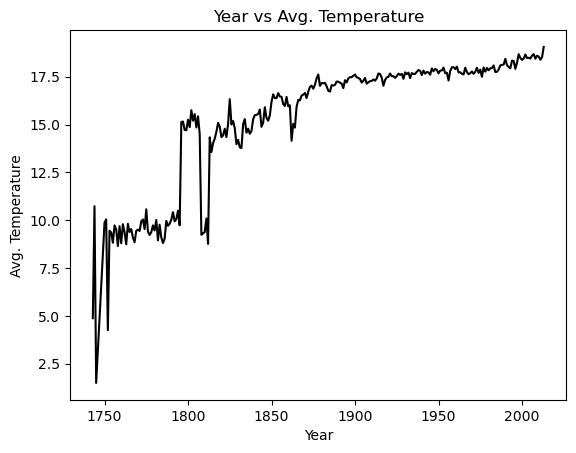

In [65]:
data['dt']=pd.to_datetime(data['dt'],errors='coerce')
data['year']=data['dt'].dt.year
x=data.groupby('year')['AverageTemperature'].mean().reset_index()
plt.plot(x['year'],x['AverageTemperature'],color='black')
plt.xlabel('Year')
plt.ylabel("Avg. Temperature")
plt.title("Year vs Avg. Temperature")
plt.show()

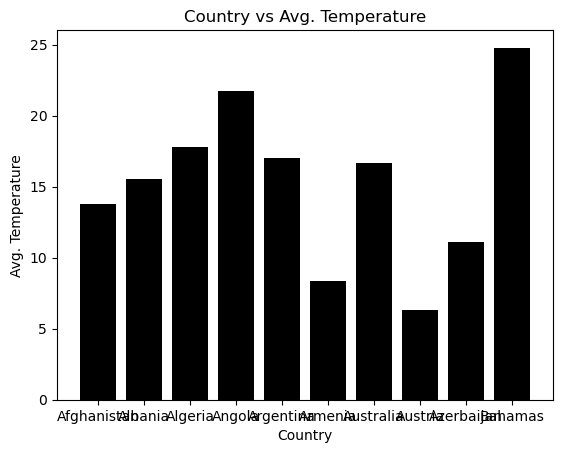

In [40]:
data=data.dropna()
x=data.groupby('Country')['AverageTemperature'].mean().reset_index()
plt.bar(x.iloc[0:10,0],x.iloc[0:10,1],color='black')
plt.xlabel('Country')
plt.ylabel("Avg. Temperature")
plt.title("Country vs Avg. Temperature")
plt.show()


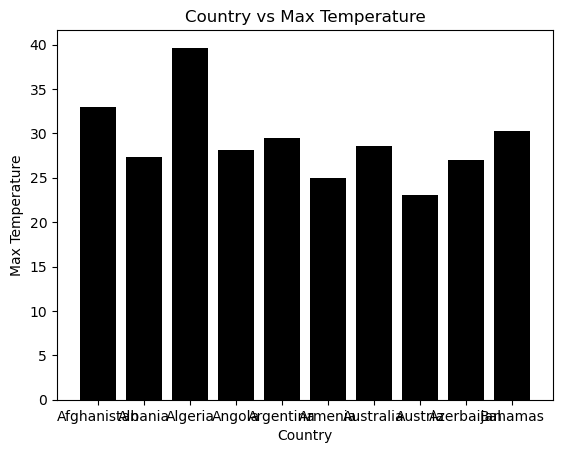

In [42]:
data=data.dropna()
x=data.groupby('Country')['AverageTemperature'].max().reset_index()
plt.bar(x.iloc[0:10,0],x.iloc[0:10,1],color='black')
plt.xlabel('Country')
plt.ylabel("Max Temperature")
plt.title("Country vs Max Temperature")
plt.show()

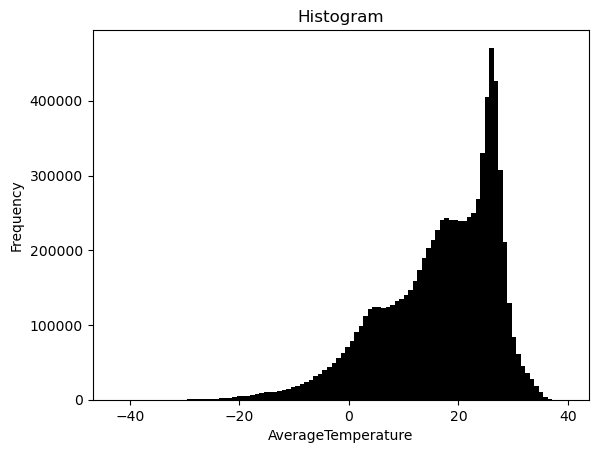

In [47]:
plt.hist(data['AverageTemperature'],bins=100,color='black')
plt.xlabel('AverageTemperature')
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

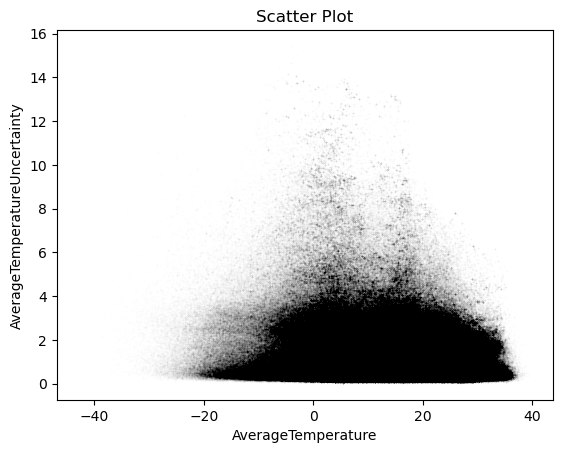

In [63]:
plt.scatter(data['AverageTemperature'],data['AverageTemperatureUncertainty'],s=0.5,alpha=0.003,color='black')
plt.xlabel('AverageTemperature')
plt.ylabel("AverageTemperatureUncertainty")
plt.title("Scatter Plot")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c95ef6ea10>,
 'caps': [<matplotlib.lines.Line2D at 0x1c95ef6fd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c95ef6dfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c95ef78f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c95ef79790>],
 'means': []}

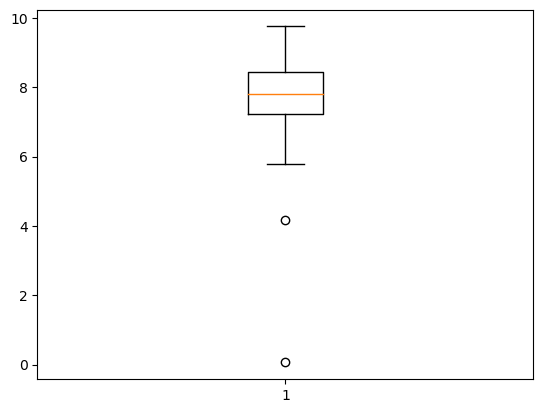

In [85]:
c=data[data['Country']=='Denmark']
a=c.groupby('year')['AverageTemperature'].mean().reset_index()
plt.boxplot(a['AverageTemperature'])

In [80]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744
...,...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E,2013
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,2013
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,2013
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,2013


In [86]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [87]:
import seaborn as sns
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [89]:
tips.shape

(244, 7)

In [90]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [91]:
tips.size

1708

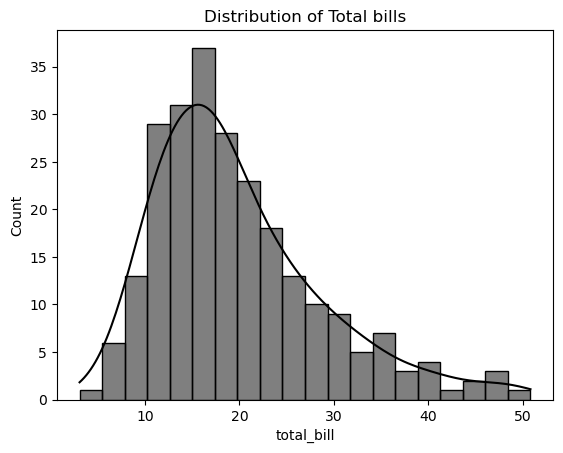

In [101]:
#Histogram -> Shows the distribution of a single variable
#             X-axix -> column_name
#             Y-axis -> count
sns.histplot(tips['total_bill'],bins=20,color='black',kde=True)
plt.title("Distribution of Total bills")
plt.show()

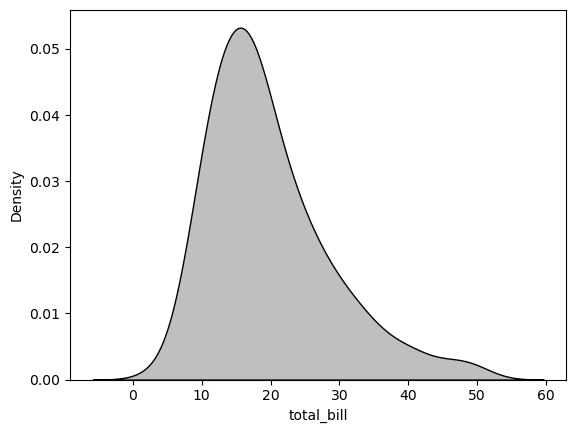

In [108]:
#KDE -> Kernel Desnsity Estimation, Visualizes the probability density of a variable
#       X-axis -> column_name
#       Y-axis -> Density
sns.kdeplot(tips['total_bill'],fill=True,color='black')
plt.show()

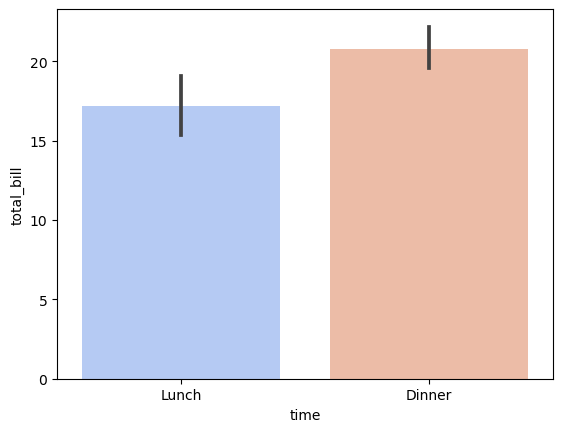

In [124]:
#Barplot -> Displays mean of a quantitative varible for different categories
#           X-axis -> Category
#           Y-axis -> Quantitative 
sns.barplot(x=tips['time'],y=tips['total_bill'],palette='coolwarm')
plt.show()

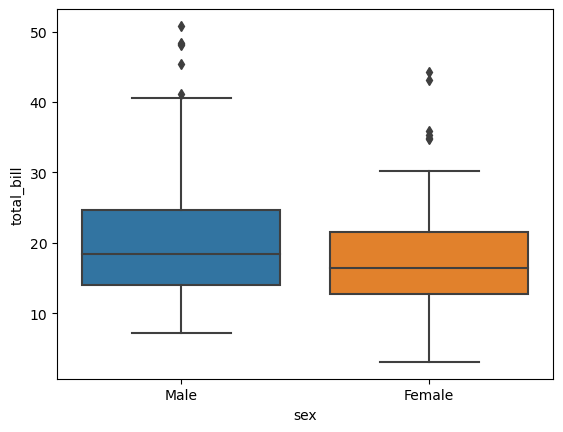

In [126]:
sns.boxplot(x=tips['sex'],y=tips['total_bill'])
plt.show()

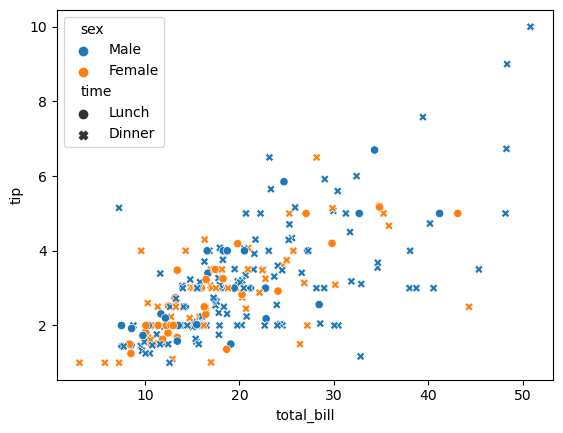

In [133]:
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex'],style=tips['time'])
plt.show()

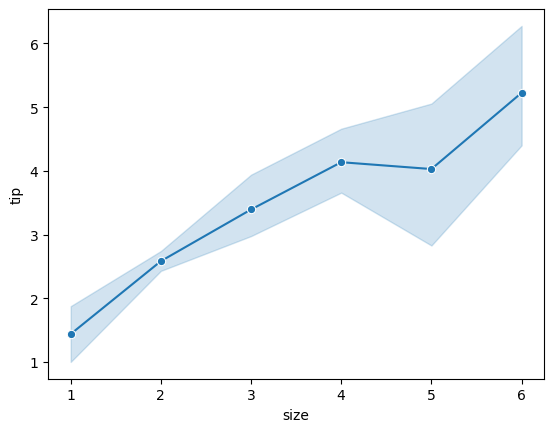

In [136]:
sns.lineplot(data=tips,x='size',y='tip',marker='o')
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


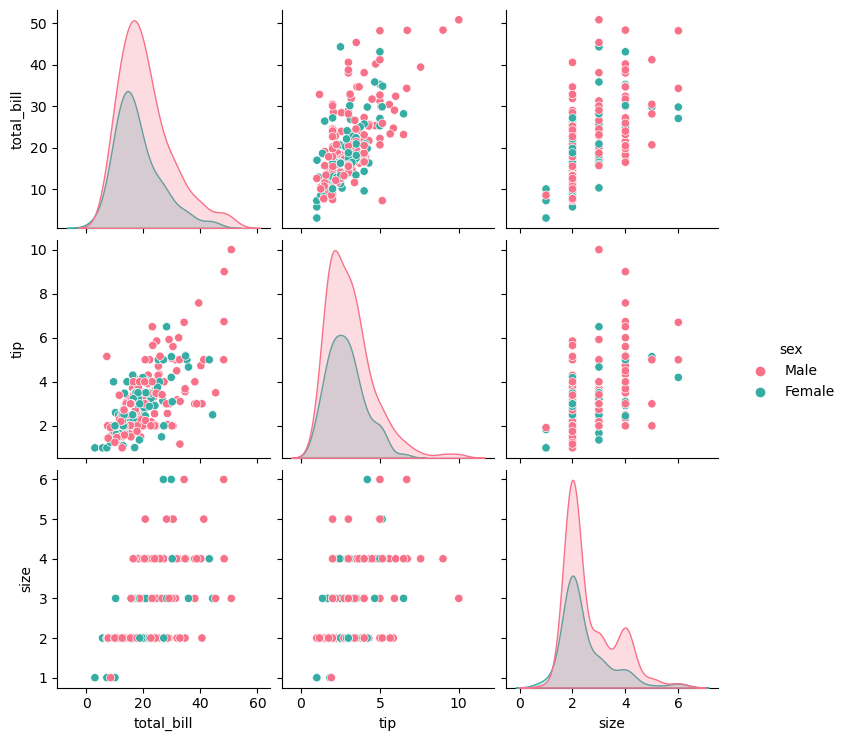

In [144]:
sns.pairplot(data=tips,hue='sex',palette='husl')
plt.show()

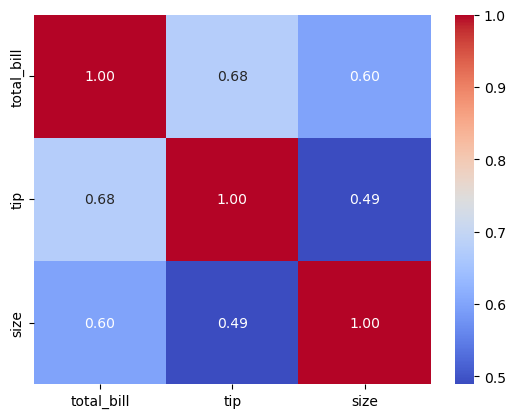

In [151]:
numerical_tips = tips.select_dtypes(include=['float64', 'int64'])
correlation_matrix=numerical_tips.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [160]:
train=pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


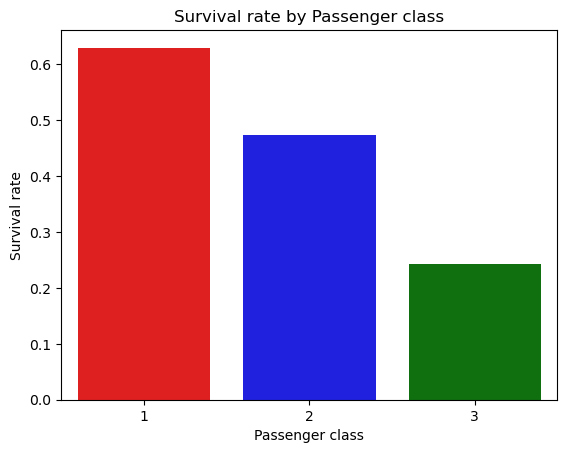

In [157]:
sns.barplot(data=train,x='Pclass',y='Survived',errorbar=None,palette=['red','blue','green'])
plt.title("Survival rate by Passenger class")
plt.xlabel("Passenger class")
plt.ylabel("Survival rate")
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

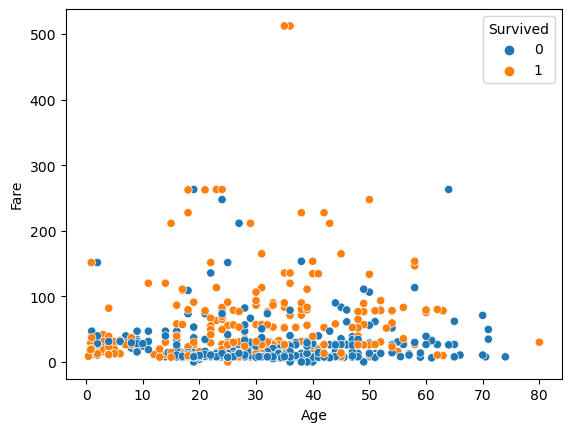

In [169]:
sns.scatterplot(data=train,x='Age',y='Fare',hue='Survived')

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


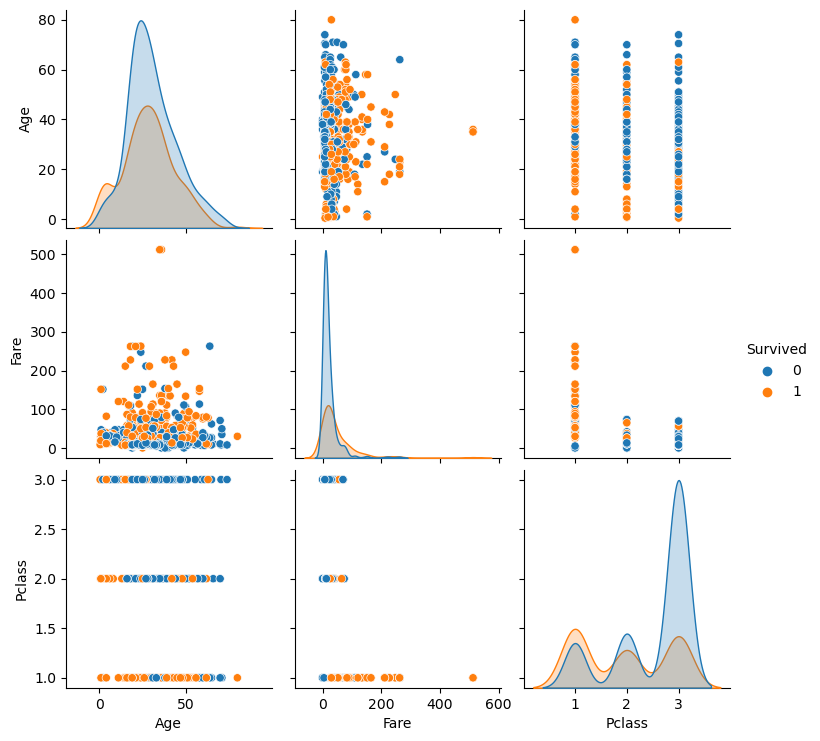

In [181]:
selected_columns = train[['Age', 'Fare', 'Pclass','Survived']]
sns.pairplot(data=selected_columns,hue='Survived')
plt.show()

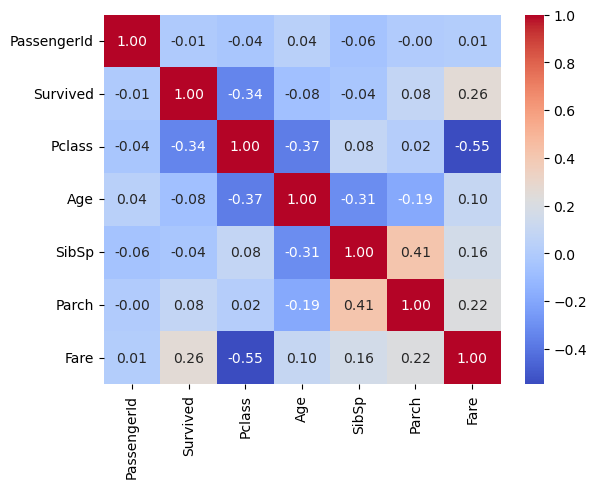

In [183]:
numerical = train.select_dtypes(include=['float64', 'int64'])
correlation_matrix=numerical.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()